## U.S. Gun Death Statistics Analysis

I completed this project as part of the DataQuest (dataquest.io) Data Scientist Path cirriculum. A few aspects of the project were guided, but the majority sections are custom, independent results. It explores information about U.S. gun deaths from 2012–2014. It was the first project in the course, and does not use Pandas for analysis (see other projects for use of Pandas). Instead, it uses lower level programming to explore the data (e.g. for-loops to generate dictionaries) and to  examine questions about the dataset. 

### Data Questions Explored
- Do gun deaths vary by year?
- Do gun deaths vary by month or seasonally?
    - Are variations caused by a certain intent?
    - What type of gun death is most prevalent?
- What is the per capita gun death rate by race?
- What is the per capita gun death from police by race?

### Techniques used
- Dictionary generation using for-loops
    - for-loops with enumeration
    - boolean logic
- Datetime
- Custom functions
- Data visualization using matplotlib
    - Line plots
    - Bar plots

### Data Source
FiveThirtyEight: https://github.com/fivethirtyeight/guns-data


In [100]:
## Reading in the Data

import csv

f = open("guns.csv",'r')
d = csv.reader(f, delimiter = ",")
data = list(d)

headers = data[0]
data = data[1:]

print(headers)
print(data[0])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4']


## Gun Deaths by Year 

In [101]:
# Creating a dictionary that contains the number of deaths for each year in the dataset

year_counts = {}

for row in data:
    year = row[1]
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
        
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

### Note about gun deaths by year.
It does not appear that gun deaths have any significant variation by year and hold remarkably steady over the 3 year period in this sample. Yearly gun deaths will not be explored further because any sort of comparision (e.g. t-test) would show no significant difference. Next, we will look into the time in more detail—by month.

## Gun Deaths by Month
The following code will extract dates for each death using datetime, count them up by month, and add into a dictionary. The data for each year is visualized at the end with a line plot.

In [102]:
# For each gun death in the dataset, a datetime value is generated with the year and month. 
# Each day is set equal to 1, so this datetime essentially shows the month.

import datetime

dates = []
for row in data:
    year = int(row[1])
    month = int(row[2])
    date = datetime.datetime(year, month, day = 1)
    dates.append(date)
    
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

In [158]:
# counting the gun deaths for each month and placing values into a dictionary

date_counts = {}

for date in dates:
    if date in date_counts:
        date_counts[date] += 1
    else:
        date_counts[date] = 1    

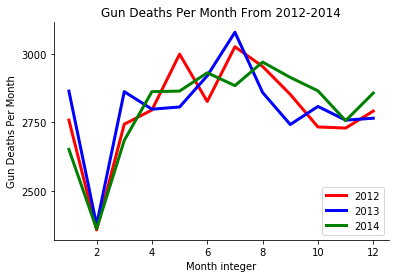

In [147]:
# creating a plot of gun deaths by month for each year in the data set
%matplotlib inline
import matplotlib.pylab as plt

x_datetime, y_value = zip(*date_counts.items()) 

years = ['2012', '2013', '2014']
colors = ['red', 'blue', 'green']

# x-axis month integer values; e.g. Jan = 1, Dec = 12
x_month_integer = range(1, 13)

# generating a line plot for each year
fig, ax = plt.subplots()

for i in range(3):
    start_index = i*12
    end_index = (i+1)*12
    y_year = y_value[start_index:end_index]
    ax.plot(x_month_integer, y_year, c=colors[i], label=years[i], linewidth=3)
    ax.legend(loc='lower right')
    ax.set_yticks([2500, 2750, 3000])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.title('Gun Deaths Per Month From 2012-2014')
plt.xlabel('Month integer')
plt.ylabel('Gun Deaths Per Month')

plt.show()

### Note about gun deaths by month
While the plot above shows slight variation between years, some trends do emerge. 

- an increase in deaths in the summer months, and
- a sharp dip in deaths in February.

The sharp dip in February may simply be due to the shorter number of days in the month since this is a total count per month. The next code cell will normalize February to 30.5 days and calculate average for each month across the 3 years. The data will be plotted to clarify these trends.

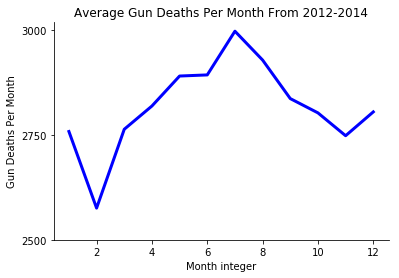

In [157]:
y_value = list(y_value)
for i in range(1,36,12):
    if y_value[i] < 2400:
        y_value[i] = y_value[i]*30.5/28
    
year_list_list = [y_value[:12], y_value[12:24], y_value[24:36]]
avg_month = [sum(col)/len(col) for col in zip(*year_list_list)]

fig, ax = plt.subplots()

plt.plot(x_month_integer, avg_month, c='blue', linewidth=3)
plt.title('Average Gun Deaths Per Month From 2012-2014')
plt.xlabel('Month integer')
plt.ylabel('Gun Deaths Per Month')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks([2500, 2750, 3000])

plt.show()

### Note about gun deaths by month
Averaging the years clears up the trends more than the previous plot. There appears to be a signficant spike in the summer months. After normalizing February to 30.5 days, the dip in deaths during that month isn't as drastic (~2350 on average to ~2550 on average), but an appreciable dip still occurs.

More details for these trends will be explored in the next portion of this project by looking at intents. The 'intent' column categorizes deaths by homicide, suicide, accidental, and unidentified. I will count the intents by month to explore if a certain type of death causes the observed trends. 

## Gun Deaths Per Month by Intent
This section will break down the previous average deaths per month by the various intents.

In [160]:
# creating a function to count deaths for each month according to intent. 
# dictionaries made for suicide, homicide, and accidental deaths

def count_by_month_intent(intent_str):
    month_dict = {}
    for row in data:
        month = row[2]
        intent = row[3]
        if intent == intent_str:
            if month in month_dict:
                month_dict[month] += 1
            else:
                month_dict[month] = 1 
    return month_dict
            
suicide_month = count_by_month_intent('Suicide')
homicide_month = count_by_month_intent('Homicide')
accidental_month = count_by_month_intent('Accidental')
suicide_month 

{'01': 5220,
 '02': 4732,
 '03': 5309,
 '04': 5438,
 '05': 5506,
 '06': 5367,
 '07': 5514,
 '08': 5421,
 '09': 5343,
 '10': 5256,
 '11': 5086,
 '12': 4983}

In [161]:
# this function normalizes February to 30.5 days, creates an average over the 3 years, and
# returns the values for each dictionary to be plotted in the next cell

def avg_intents(intent_dict):
    yval = []
    for k, v in intent_dict.items():
        if k == '02':
            v = v*30.5/28
        v = v/3
        yval.append(v)
    return yval
    
avg_intents(suicide_month)

[1740.0,
 1718.1666666666667,
 1769.6666666666667,
 1812.6666666666667,
 1835.3333333333333,
 1789.0,
 1838.0,
 1807.0,
 1781.0,
 1752.0,
 1695.3333333333333,
 1661.0]

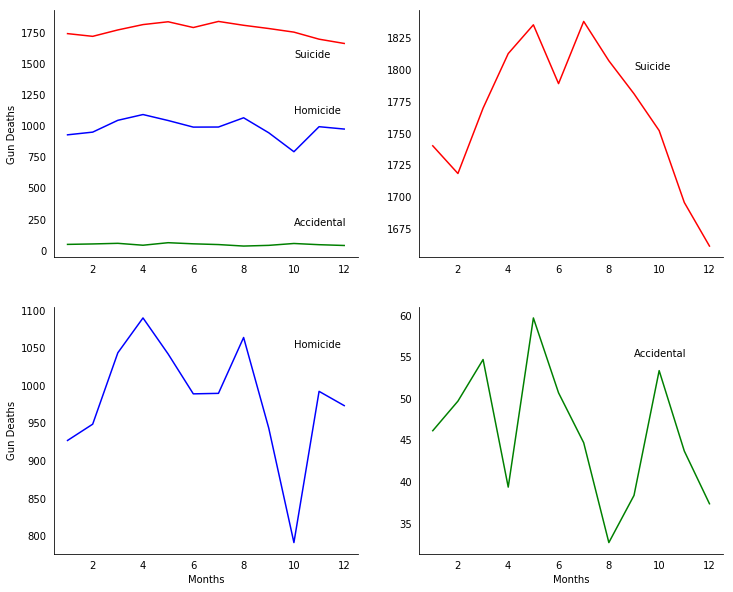

In [162]:
a = avg_intents(suicide_month)
b = avg_intents(homicide_month)
c = avg_intents(accidental_month)

intent_plot = [a, b, c]
intent_titles = ['All Three Intents', 'Suicide', 'Homicide', 'Accidental']
color_list = ['red', 'blue', 'green']

fig = plt.figure(figsize = (12,10))

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    
    if i == 0:
        ax.plot(x_month_integer, a, color='red', label='Suicide')
        ax.plot(x_month_integer, b, color='blue', label='Homicide')
        ax.plot(x_month_integer, c, color='green', label='Accidental')
        ax.text(10,1550,'Suicide')
        ax.text(10,1100, 'Homicide')
        ax.text(10,200, 'Accidental')
        ax.set_ylabel('Gun Deaths')
        
    else:
        ax.plot(x_month_integer, intent_plot[i-1], color=color_list[i-1])
    
    if i == 1:
        ax.text(9,1800, 'Suicide')
    if i == 2:
        ax.text(10, 1050, 'Homicide')
        ax.set_ylabel('Gun Deaths')
        ax.set_xlabel('Months')
    if i == 3:
        ax.text(9, 55, 'Accidental')
        ax.set_xlabel('Months')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #ax.set_title(intent_titles[i])
    ax.tick_params(bottom='off', top='off', left='off', right='off')

plt.show()

### Findings from Gun Deaths per Month Broken Down by Intent
1. Suicides account for approximately 2/3 of the total gun deaths. This is best shown in the first plot. Note the final 3 plots have different scales to show variation by month for each intent.
2. Suicides show an apparent increase in the summer. While homicide data is more noisy, it also appears to increase during the Spring and early Summer compared to the Fall/Winter. 
3. Accidental deaths show no clear trend and have little impact on the overall data.

## Gun Deaths by Race
This analysis will look at the gun deaths by race. It will first show raw totals of gun deaths for each race, followed by normalizing the data by total population (per capita). It will then explore per capita deaths for different races based on homicide vs. suicide, as well as by deaths from police. The data is visualized using bar plots.

In [79]:
# creating a dictionary that counts the number of guns deaths by race

race_counts = {}
for row in data:
    race = row[7]
    if race in race_counts:
        race_counts[race] += 1
    else:
        race_counts[race] = 1
        
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

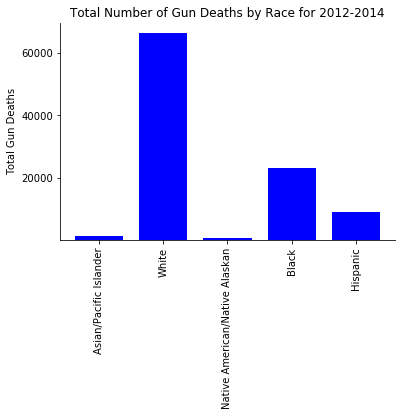

In [95]:
# plotting the gun death by race counts from previous cell

x_race, y_counts = zip(*race_counts.items())

tick_pos = range(0, 5)
bar_position = range(5)

fig, ax = plt.subplots()

ax.bar(bar_position, y_counts, 0.75,  color='blue',)

ax.set_xticks(tick_pos)
ax.set_xticklabels(x_race, rotation = 90)

plt.ylabel('Total Gun Deaths')
plt.title('Total Number of Gun Deaths by Race for 2012-2014')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([20000, 40000, 60000])

plt.show()

### Note about gun deaths by race

White Americans suffer the most deaths by raw totals, but this data does not take into account the total populations for each of these races. The U.S. census data from this time period will be used to normalize each of these values per capita (per 100,000 citizens).

## Gun Deaths by Race per Capita
The census data will be used to normalize the previous data by the total population.

In [83]:
# reading in the census data

f = open("census.csv",'r')
d = csv.reader(f, delimiter = ',')
census = list(d)

In [84]:
# the census data has different labels for each group. 
# a dictionary with matching keys to our existing dictionary is created for the census data

census_counts = {
    "White": int(census[1][10]),
    "Hispanic": int(census[1][11]),
    "Black": int(census[1][12]),
    "Native American/Native Alaskan": int(census[1][13]),
    "Asian/Pacific Islander": (int(census[1][14]) + int(census[1][15]))
}

census_counts

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

In [85]:
# converting the raw totals by race to per capita (per 100,000)

race_per_hundredk = {}

for k,v in race_counts.items():
    race_per_hundredk[k] = (100000 * v / census_counts[k])
    
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.877347773519595,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

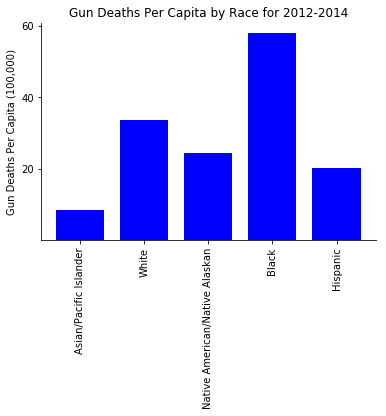

In [99]:
# plotting the per capita deaths by race data

x_race, y_counts = zip(*race_per_hundredk.items())

tick_pos = range(0, 5)
bar_position = range(5)

fig, ax = plt.subplots()

ax.bar(bar_position, y_counts, 0.75,  color='blue')

ax.set_xticks(tick_pos)
ax.set_xticklabels(x_race, rotation = 90)

plt.ylabel('Gun Deaths Per Capita (100,000)')
plt.title('Gun Deaths Per Capita by Race for 2012-2014')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([20, 40, 60])

plt.show()

### Note about gun deaths per capita
While the White population experiences the most total deaths, the Black population experiences a higher number of deaths per capita.

## Number of Homicides and Suicides by Race
This data will break down the race data by homicides and suicides

In [87]:
## Number of homicides or suicides by Race (per capita times 100k)

intents = [row[3] for row in data]
race = [row[7] for row in data]

def intent_race_per_capita(intent):
    intent_race_counts = {}
    for row in data:
        intents = row[3]
        race = row[7]
        if intents == intent:
            if race in intent_race_counts:
                intent_race_counts[race] += 1
            else:
                intent_race_counts[race] = 1
    
    for k, v in intent_race_counts.items():
        intent_race_counts[k] = (100000*v)/census_counts[k]
    
    return intent_race_counts
        
a = intent_race_per_capita('Suicide')
b = intent_race_per_capita('Homicide')
a = sorted(a.items())
b = sorted(b.items())
a

[('Asian/Pacific Islander', 4.705023152187416),
 ('Black', 8.278130270491385),
 ('Hispanic', 7.10698045109715),
 ('Native American/Native Alaskan', 14.841532544673013),
 ('White', 28.06217969245692)]

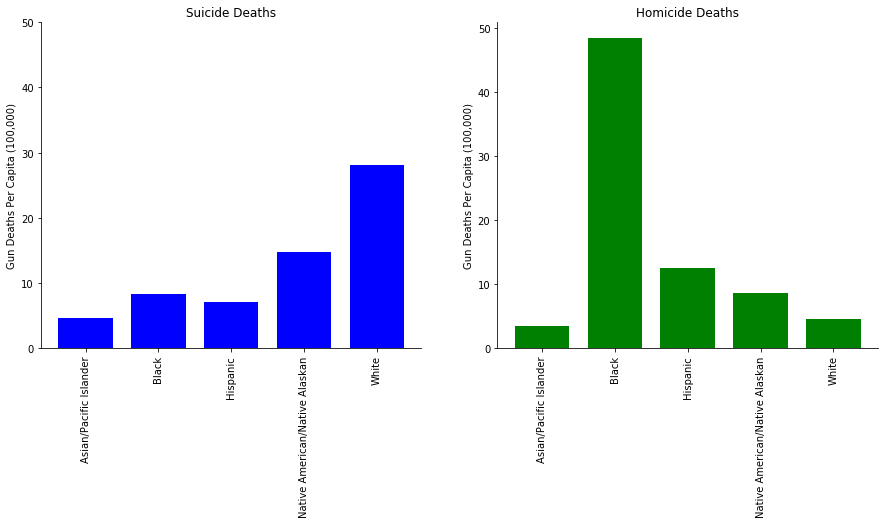

In [89]:
# creating bar plots of the suicide and homicide data

x_race1, y_suicide = zip(*a)
x_race2, y_homicide = zip(*b)

fig = plt.figure(figsize = (15,6))

#plt.xlabel('Months')
#plt.ylabel('Average Gun Deaths')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tick_pos = range(0, 5)
bar_position = range(5)

ax1.bar(bar_position, y_suicide, 0.75, color='blue')
ax1.set_xticks(tick_pos)
ax1.set_xticklabels(x_race1, rotation = 90)
ax1.set_ylabel('Gun Deaths Per Capita (100,000)')
ax1.set_title('Suicide Deaths')
ax1.set_ylim(0,50)

ax2.bar(bar_position, y_homicide, 0.75, color = 'green')
ax2.set_xticks(tick_pos)
ax2.set_xticklabels(x_race2, rotation = 90)
ax2.set_ylabel('Gun Deaths Per Capita (100,000)')
ax2.set_title('Homicide Deaths')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

### Findings of Intent and Race
The White population is most likely to have a suicide death, while the Black population is most likely to have a homcide death. Note that the y-axis scales are the same for both plots to compare between plots.

## Gun Death from Police
This analysis will show how many guns deaths from police per capita for each race.

In [90]:
## gun deaths from police by race (per capita times 100,000)

police = [row[4] for row in data]

police_death_race = {}
for i, k in enumerate(police):
    if k == '1':
        if race[i] in police_death_race:
            police_death_race[race[i]] += 1
        else:
            police_death_race[race[i]] = 1

for j, v in police_death_race.items():
    police_death_race[j] = (100000 * v / census_counts[j])
    
police_death_race

{'Asian/Pacific Islander': 0.1894640195511711,
 'Black': 0.8844580961269307,
 'Hispanic': 0.6320304280067475,
 'Native American/Native Alaskan': 0.6685375020122979,
 'White': 0.35931671967694784}

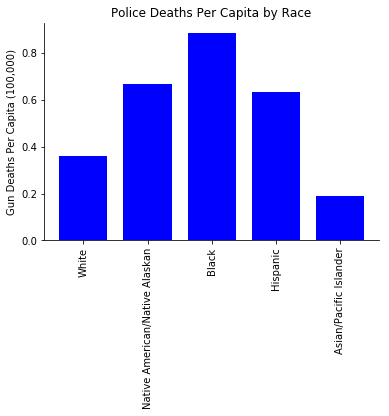

In [97]:
# creating bar plot of police data

x_race, y_counts = zip(*police_death_race.items())

tick_pos = range(0, 5)
bar_position = range(5)

fig, ax = plt.subplots()

ax.bar(bar_position, y_counts, 0.75,  color='blue')

ax.set_xticks(tick_pos)
ax.set_xticklabels(x_race, rotation = 90)

plt.ylabel('Gun Deaths Per Capita (100,000)')
plt.title('Police Deaths Per Capita by Race')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Findings of Police Data
Police deaths are approximately 50x less likely than the other types previously examined (suicide / homicide). The Black population has the highest per capita death rate from police out of the five races.